# Machine Learning and Statisitics 2020

## Project 2020

### Student ID: Claire Nolan G00376464

## Background Information

The aim of this project is to use a dataset (powerproduction.csv) to create a model which makes predictions about the wind turbine power output (y) based in the wind speed input (x).

A wind turbine produces electricity by using the kinetic or moving energy of wind to create motion. The amount of electricity that a single turbine is able to produce depends on its size, the wind speed and the efficiency with which that specifically designed turbine is able to convert wind energy to electrical energy. The wind turbine will start operating at wind speeds of four to five metres per second. At speeds of 15 metres per second, the wind turbine will reach its maximum output. If the wind speeds reach 25 metres per second or greater, the turbine will be shut down to avoid damage to the turbine occurring. Therefore Wind energy is not a particularly reliable source of energy.

![https://www.google.com/imgres?imgurl=https%3A%2F%2Fwww.energy.gov%2Fsites%2Fprod%2Ffiles%2Fstyles%2Fborealis_photo_gallery_large_respondmedium%2Fpublic%2F2017%2F06%2Ff34%2Fwind_graphic.jpg%3Fitok%3DhwAc2zRU&imgrefurl=https%3A%2F%2Fwww.energy.gov%2Feere%2Farticles%2Fhow-do-wind-turbines-survive-severe-storms&tbnid=8YmI_ecoW43E0M&vet=12ahUKEwibi4jqy4DuAhUeZhUIHeDoA5wQMygAegUIARCiAQ..i&docid=iYnKIcxc0OBeFM&w=525&h=276&q=wind%20turbine%20speed&ved=2ahUKEwibi4jqy4DuAhUeZhUIHeDoA5wQMygAegUIARCiAQ](attachment:image.png)


https://en.wikipedia.org/wiki/Wind_turbine
https://enerpower.ie/portfolio/wind-turbine-faq-ireland/
https://www.bordnamona.ie/company/our-businesses/powergen/frequently-asked-questions/
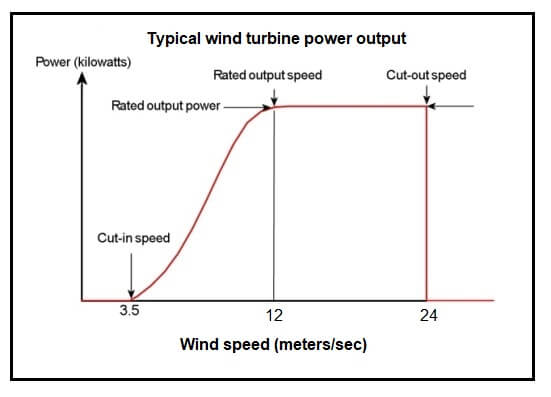

<br>

## 1. Import required libraries
***

Keras:
Keras is a deep learning API written in Python, running on top of the machine learning platform TensorFlow. It was developed with a focus on enabling fast experimentation. TensorFlow 2.0 is an end-to-end, open-source machine learning platform. You can think of it as an infrastructure layer for differentiable programming.

Pandas:
Pandas is used for data manipulation, analysis and cleaning. It is used for different kinds of data, such as Tabular data, ordered and unordered time series data, matrix data with row & column labels and any other statistical data sets.

Numpy:
Numpy creates random data. It is a general-purpose array-processing package. It provides a high-performance multidimensional array object, and tools for working with these arrays. It is the fundamental package for scientific computing with Python.

Matplotlib:
The Matplotlib program allows for the creation of plots of data. It is the plotting library for the Python programming language. It creates 2D and 3D plots for data analysis.

Seaborn:
The Seaborn program allows for the visualisation of data. It provides high-level commands to create a variety of plot types useful for statistical data exploration and statistical model fitting.

In [48]:
# Neural networks.
import tensorflow.keras as kr

# Numerical arrays
import numpy as np

# Data frames.
import pandas as pd

# Plotting
import matplotlib.pyplot as plt

import seaborn as sns

In [49]:
# Plot style.
plt.style.use("ggplot")

# Plot size.
plt.rcParams['figure.figsize'] = [14, 8]

<br>

## 2. Simple Investigation of the dataset
***

This is performed so I can get an understanding of the data and the shape of the line as there is not much detail about the dataset eg units of measurement, the timeframe the data is taken, is the data from one or many turbines, location etc.

There is only one input, speed, and one output, power.

In [50]:
# Import the dataset

df = pd.read_csv("https://raw.githubusercontent.com/ClaireGMIT/MLS_Project2020/main/powerproduction.csv") 

df.head(10) # displays the first 10 rows of the data set as a table/array



,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


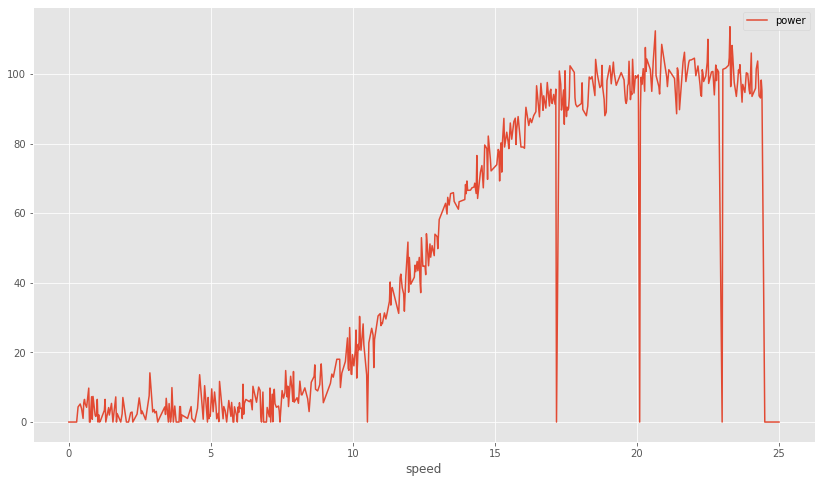

In [51]:
df.plot(x="speed", y="power")
plt.show()

From the scatterplot above I can see the data is not linear. The graph also follows the structure of the picture above ie the wind turbine begins to output power when the speed hits approximately 8 and stops when the speed hits approximately 24. This is a safety feature to prevent damage to the turbine at high speeds. Note there are some data points where the speed is zero. This may mean the turbines were turned off for maintenance, protection etc.

<br>

## 3. The model

***



In [52]:
#Changing pandas dataframe to numpy array
#Before feeding data to our neural network we need it in a specific way so we need to process it accordingly. 
#The preprocessing of data depends on the type of data.
# https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5 
X = df.iloc[:,:20].values
y = df.iloc[:,20:21].values

In [53]:
#Normalizing the data
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X = sc.fit_transform(X)

#This step is used to normalize the data. Normalization is a technique used to change the values of an array to a common scale, without distorting differences in the ranges of values. It is an important step and you can check the difference in accuracies on our dataset by removing this step. It is mainly required in case the dataset features vary a lot as in our case the value of battery power is in the 1000’s and clock speed is less than 3. So if we feed unnormalized data to the neural network, the gradients will change differently for every column and thus the learning will oscillate. Study further from this link.

In [54]:
#Generally, it is better to split data into training and testing data. Training data is the data on which we will train our neural network. Test data is used to check our trained neural network. This data is totally new for our neural network and if the neural network performs well on this dataset, it shows that there is no overfitting. 
#This will split our dataset into training and testing. Training data will have 90% samples and test data will have 10% samples. This is specified by the test_size argument.


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1)

### 3.1 First attempt

Load Data.
Define Keras Model.
Compile Keras Model.
Fit Keras Model.
Evaluate Keras Model.
Tie It All Together.
Make Predictions

In [55]:
# FAKE DATASET
# that know has a linear relationship with some noise
# use lambda notion: https://www.w3schools.com/python/python_lambda.asp

# Simple linear equation.
f = lambda x: 3.0 * x + 1.0

In [56]:
x="speed"
y="power"

In [57]:
# Create a training data frame with x and y values.
# The x values are randomly selected between 0 and 100.
# y_i is f(x_i)
train = pd.('speed', 'power') #Panda dataframe (x, f(x)), y=f(x). no noise added yet
train['speed'] = x # ie choose 1000 random data points for x between 0 and 100 using function above
train['power'] = f(train['speed']) # 
train

SyntaxError: invalid syntax (<ipython-input-57-c05111b7d22e>, line 4)

In [58]:
x="speed"
y="power"

In [59]:
# Create a corresponding test data frame. as per above
# It might be better to create one big data frame and randomly select test cases.
test = pd.DataFrame(df)
test['speed'] = x # only 100 data points
test['power'] = f(test['speed'])
test

TypeError: can't multiply sequence by non-int of type 'float'

In [60]:
# Create a neural network with one neuron.
model = kr.models.Sequential()
#single neuron
# model is linear
model.add(kr.layers.Dense(1, input_shape=(1,), activation="linear", kernel_initializer='ones', bias_initializer='zeros'))
# adam is used as the optimiser as it is adaptive
model.compile('adam', loss='mean_squared_error')

In [61]:
# Train the neural network on our training data.
#fit training dataset to neural network, pass x values in to neural network and determine what y would be. See if these y values match the model y-values
# epoch means that every single xvalue goes throught the neural network 500 times. Everytime it goes through, the NN tries to improve the prediction
# can see the improvement in the epoch log below from 1 to 500 to decrease the loss. Want a small loss value ie miniscule but may depend on the dataset
# if peters out at a high level may need to change the model or check out the inputs as they may need preprocessing
# adam (learning rate) 
model.fit(train['x'], train['y'], epochs=500)
# 500 epochs can take time

NameError: name 'train' is not defined

In [62]:
# Take four hand-picked values and see their predictions.
# see if they compare to data faked above
model.predict([1.0,2.0,3.0,100.0])

array([[  1.],
       [  2.],
       [  3.],
       [100.]], dtype=float32)

In [63]:
# See what f says they are.
#comparable to NN prediction in cell above
# NN knows nothing about the function but has learned how to calculate the function
np.array([[f(i)] for i in [1.0, 2.0, 3.0, 100.0]])

array([[  4.],
       [  7.],
       [ 10.],
       [301.]])

In [64]:
# Let's plot our predictions of the x values we trained on
# ie 
plt.plot(test['x'], test['y'], label='actual') #
plt.plot(test['x'], model.predict(test['x']), label='prediction') #ie after training
plt.legend();

KeyError: 'x'

In [65]:
# Evaluate the neural network on the test data.
model.evaluate(test['x'], test['y'])

KeyError: 'x'

In [66]:
# Let's set f to a polynomial instead. ie more complex
f = lambda x: 2.0 * x**2 + 3.0 * x + 4.0 # adding in x-squared value

poly = pd.DataFrame()
poly['x'] = np.linspace(-10.0, 10.0, 1000)
poly['y'] = poly['x'].apply(f) # apply(f) is a Pandas method

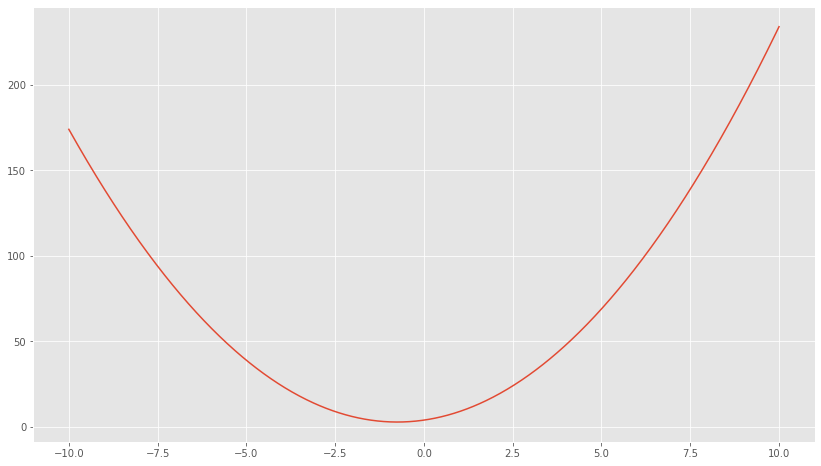

In [67]:
# Have a look.
plt.plot(poly['x'], poly['y']);

In [68]:
# Re-build our model. same code as above
model = kr.models.Sequential()
model.add(kr.layers.Dense(1, input_shape=(1,), activation='linear', kernel_initializer="ones", bias_initializer="zeros"))
model.compile('adam', loss='mean_squared_error')

In [69]:
# Fit the data.Loss function going down but slowly
model.fit(poly['x'], poly['y'], epochs=500)

# if NaNs thn there is a problem with the model

Epoch 1/500
32/32 [==============================] - 2s 994us/step - loss: 8692.1085
Epoch 2/500
32/32 [==============================] - 0s 767us/step - loss: 9105.5406
Epoch 3/500
32/32 [==============================] - 0s 872us/step - loss: 8952.8669
Epoch 4/500
32/32 [==============================] - 0s 700us/step - loss: 8811.2507
Epoch 5/500
32/32 [==============================] - 0s 824us/step - loss: 8705.0924
Epoch 6/500
32/32 [==============================] - 0s 683us/step - loss: 8612.3324
Epoch 7/500
32/32 [==============================] - 0s 864us/step - loss: 9056.7421
Epoch 8/500
32/32 [==============================] - 0s 885us/step - loss: 8188.0792
Epoch 9/500
32/32 [==============================] - 0s 754us/step - loss: 8358.6240
Epoch 10/500
32/32 [==============================] - 0s 699us/step - loss: 8434.0190
Epoch 11/500
32/32 [==============================] - 0s 922us/step - loss: 8616.4605
Epoch 12/500
32/32 [==============================] - 0s 696us/

32/32 [==============================] - 0s 718us/step - loss: 8240.1017
Epoch 96/500
32/32 [==============================] - 0s 705us/step - loss: 8456.5870
Epoch 97/500
32/32 [==============================] - ETA: 0s - loss: 7268.62 - 0s 1ms/step - loss: 8244.9448
Epoch 98/500
32/32 [==============================] - 0s 902us/step - loss: 8093.6778
Epoch 99/500
32/32 [==============================] - 0s 865us/step - loss: 7715.3943
Epoch 100/500
32/32 [==============================] - 0s 895us/step - loss: 8565.1473
Epoch 101/500
32/32 [==============================] - 0s 818us/step - loss: 8404.8135
Epoch 102/500
32/32 [==============================] - 0s 827us/step - loss: 8534.3545
Epoch 103/500
32/32 [==============================] - 0s 835us/step - loss: 7985.0717
Epoch 104/500
32/32 [==============================] - 0s 756us/step - loss: 8111.5863
Epoch 105/500
32/32 [==============================] - 0s 696us/step - loss: 8374.0617
Epoch 106/500
32/32 [================

32/32 [==============================] - 0s 896us/step - loss: 7951.9006
Epoch 188/500
32/32 [==============================] - 0s 843us/step - loss: 7934.4752
Epoch 189/500
32/32 [==============================] - 0s 776us/step - loss: 7490.5537
Epoch 190/500
32/32 [==============================] - 0s 691us/step - loss: 7562.5446
Epoch 191/500
32/32 [==============================] - 0s 686us/step - loss: 7327.7855
Epoch 192/500
32/32 [==============================] - 0s 658us/step - loss: 7399.5592
Epoch 193/500
32/32 [==============================] - 0s 842us/step - loss: 8397.3246
Epoch 194/500
32/32 [==============================] - 0s 857us/step - loss: 7776.8818
Epoch 195/500
32/32 [==============================] - 0s 835us/step - loss: 7527.0483
Epoch 196/500
32/32 [==============================] - 0s 822us/step - loss: 7926.6512
Epoch 197/500
32/32 [==============================] - ETA: 0s - loss: 9584.49 - 0s 819us/step - loss: 8400.2599
Epoch 198/500
32/32 [==========

32/32 [==============================] - 0s 666us/step - loss: 7615.2409
Epoch 279/500
32/32 [==============================] - 0s 619us/step - loss: 7484.2250
Epoch 280/500
32/32 [==============================] - 0s 697us/step - loss: 7152.6126
Epoch 281/500
32/32 [==============================] - 0s 692us/step - loss: 7861.5893
Epoch 282/500
32/32 [==============================] - 0s 641us/step - loss: 7349.9053
Epoch 283/500
32/32 [==============================] - 0s 709us/step - loss: 7770.3821
Epoch 284/500
32/32 [==============================] - 0s 612us/step - loss: 7527.3724
Epoch 285/500
32/32 [==============================] - 0s 610us/step - loss: 7494.7372
Epoch 286/500
32/32 [==============================] - 0s 657us/step - loss: 7109.3947
Epoch 287/500
32/32 [==============================] - 0s 666us/step - loss: 7553.6321
Epoch 288/500
32/32 [==============================] - 0s 912us/step - loss: 7398.8660
Epoch 289/500
32/32 [==============================] - 0s

32/32 [==============================] - 0s 629us/step - loss: 7334.0810
Epoch 372/500
32/32 [==============================] - 0s 690us/step - loss: 7331.8952
Epoch 373/500
32/32 [==============================] - 0s 635us/step - loss: 7667.1247
Epoch 374/500
32/32 [==============================] - 0s 671us/step - loss: 7103.2153
Epoch 375/500
32/32 [==============================] - 0s 868us/step - loss: 6816.5648
Epoch 376/500
32/32 [==============================] - 0s 741us/step - loss: 7135.4628
Epoch 377/500
32/32 [==============================] - 0s 629us/step - loss: 6683.1714
Epoch 378/500
32/32 [==============================] - 0s 628us/step - loss: 7320.1732
Epoch 379/500
32/32 [==============================] - 0s 679us/step - loss: 7352.6935
Epoch 380/500
32/32 [==============================] - 0s 646us/step - loss: 6710.5316
Epoch 381/500
32/32 [==============================] - 0s 642us/step - loss: 7195.2698
Epoch 382/500
32/32 [==============================] - 0s

32/32 [==============================] - 0s 692us/step - loss: 7206.2220
Epoch 465/500
32/32 [==============================] - 0s 677us/step - loss: 7060.0020
Epoch 466/500
32/32 [==============================] - 0s 658us/step - loss: 6492.1338
Epoch 467/500
32/32 [==============================] - 0s 596us/step - loss: 6894.6706
Epoch 468/500
32/32 [==============================] - 0s 710us/step - loss: 6888.0718
Epoch 469/500
32/32 [==============================] - ETA: 0s - loss: 5579.98 - 0s 668us/step - loss: 6977.2924
Epoch 470/500
32/32 [==============================] - 0s 709us/step - loss: 6529.3969
Epoch 471/500
32/32 [==============================] - 0s 680us/step - loss: 6700.7215
Epoch 472/500
32/32 [==============================] - 0s 652us/step - loss: 6616.1366
Epoch 473/500
32/32 [==============================] - 0s 672us/step - loss: 6525.5999
Epoch 474/500
32/32 [==============================] - 0s 619us/step - loss: 6598.4259
Epoch 475/500
32/32 [==========

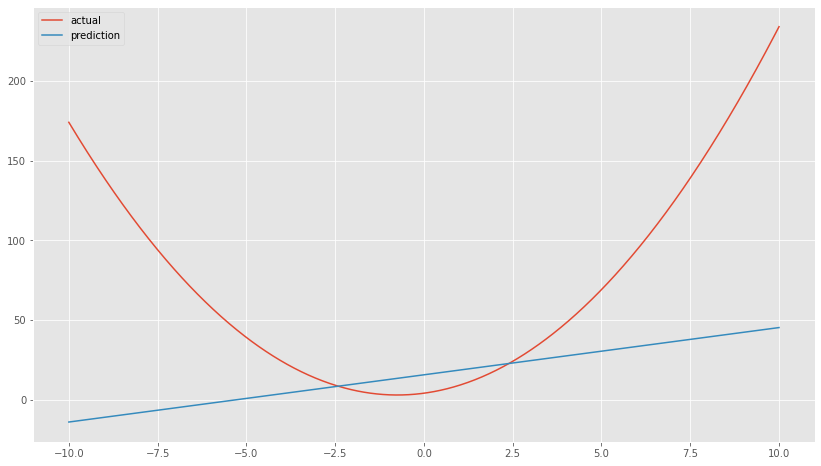

In [70]:
# Plot the predictions (on the training set itself).
#trying to do it on a linear line - ie model is wrong. can't mimic the red line. could fix by adding more layers/neurons
# instead will use a different activation function as per below
plt.plot(poly['x'], poly['y'], label='actual')
plt.plot(poly['x'], model.predict(poly['x']), label='prediction')
plt.legend();